## Install

In [1]:
# install
!pip install federpy

# import
from federpy.federpy import FederPy

### Data Preparation

In [2]:
# index file built by hnswlib or faiss.
hnswSource = 'hnswlib'
hnswIndexFile = 'https://assets.zilliz.com/hnswlib_hnsw_voc_17k_1f1dfd63a9.index'

ivfflatSource = 'faiss'
ivfflatIndexFile = 'https://assets.zilliz.com/faiss_ivf_flat_voc_17k_ab112eec72.index'

In [ ]:
import pandas as pd

# this csv includes 17,000+ items，each only includes its filename.
namesFile = "https://assets.zilliz.com/voc_names_4cee9440b1.csv"

namesCsv = pd.read_csv(namesFile)
imageUrls = ["https://assets.zilliz.com/voc2012/JPEGImages/%s" % row['name'] for index, row in namesCsv.iterrows()]

## Vis for IVF_Flat (faiss)

In [4]:
ivfflatViewParams = {
    "width": 800,
    "height": 500,
    "mediaType": "image",
    "mediaUrls": imageUrls,
    "projectMethod": "umap",
}
federPy_ivfflat = FederPy(ivfflatIndexFile, ivfflatSource, **ivfflatViewParams)

### Overview

In [5]:
federPy_ivfflat.overview()

### Search View

In [18]:
federPy_ivfflat.setSearchParams({"k": 9, "nprobe": 8}).searchRandTestVec()

## Code for IVF_Flat

## Vis for HNSW (hnswlib)

In [6]:
# init federpy
hnswViewParams = {
    "width": 800,
    "height": 500,
    "mediaType": "image",
    "mediaUrls": imageUrls
}
federPy_hnsw = FederPy(hnswIndexFile, hnswSource, **hnswViewParams)

### Overview

In [7]:
federPy_hnsw.overview()

### Search View

In [8]:
federPy_hnsw.setSearchParams({"k": 6, "ef": 8}).searchRandTestVec()

## Code

### Data Preparation

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import time
from hnsw import HNSW
from ivf import IVF


f = h5py.File('openai_embedding_output.hdf5','r')
distances = f['distances']
neighbors = f['neighbors']
test = f['test']
train = f['train']

In [13]:
distances

<HDF5 dataset "distances": shape (100, 100), type "<f8">

In [44]:
distances[0]

array([0.18023628, 0.18199849, 0.19761407, 0.20239192, 0.20566928,
       0.20731825, 0.20835632, 0.21049082, 0.21167642, 0.21186999,
       0.21456342, 0.2189573 , 0.21966851, 0.21986413, 0.2200197 ,
       0.22160095, 0.22203791, 0.22396915, 0.2240731 , 0.22436839,
       0.22584665, 0.2262705 , 0.22759867, 0.22831796, 0.22870576,
       0.22969215, 0.22984701, 0.23261583, 0.23263752, 0.23380172,
       0.23627774, 0.23633747, 0.23942387, 0.24004488, 0.24009627,
       0.24016446, 0.24083047, 0.24104905, 0.24112015, 0.24132645,
       0.24161463, 0.24238586, 0.24336779, 0.24444872, 0.24447459,
       0.24466473, 0.2450949 , 0.24516639, 0.24562347, 0.24564163,
       0.24572139, 0.24576478, 0.24611089, 0.24627946, 0.24634199,
       0.24644673, 0.24647534, 0.24690586, 0.24730973, 0.24737041,
       0.24895797, 0.24954307, 0.25012164, 0.25015455, 0.2510882 ,
       0.25342256, 0.25350779, 0.25392652, 0.25498772, 0.25530408,
       0.25627756, 0.25639355, 0.25669132, 0.25681838, 0.25688

In [14]:
neighbors

<HDF5 dataset "neighbors": shape (100, 100), type "<i8">

In [45]:
neighbors[0]

array([791, 199, 270, 498, 320, 628, 520, 739, 358,  35, 350, 387, 593,
       230,  52, 344, 644, 632,  78, 152, 678, 765, 780, 480, 831, 192,
       138, 519, 624,  49,  39,  19, 665, 315, 800, 813, 647, 575,  55,
       293, 186, 210, 627,  23, 865, 599, 158, 275, 573, 122, 860, 156,
       336,  30, 165, 425, 653, 402, 155, 706, 540, 509, 810, 348, 595,
       413, 640, 259, 184, 460, 442,  33, 533, 818, 252, 448, 176, 618,
       685, 125, 114, 169, 796, 313, 209, 341, 455, 175, 412, 222, 890,
       829, 118, 144, 376,  17,   1, 617, 424, 206])

In [15]:
train

<HDF5 dataset "train": shape (900, 1536), type "<f4">

In [16]:
test

<HDF5 dataset "test": shape (100, 1536), type "<f4">

### IVF code

In [19]:
ivf = IVF("cosine", n_clusters = 10)

ivf.fit(train)

/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
## cluster 확인
ivf.inverted_index

{0: [0,
  10,
  13,
  20,
  22,
  25,
  34,
  44,
  46,
  50,
  53,
  59,
  61,
  66,
  75,
  92,
  93,
  99,
  103,
  109,
  112,
  116,
  117,
  119,
  124,
  126,
  127,
  128,
  145,
  149,
  150,
  161,
  173,
  175,
  177,
  191,
  193,
  198,
  202,
  205,
  220,
  221,
  225,
  226,
  227,
  232,
  235,
  244,
  246,
  263,
  264,
  273,
  276,
  284,
  289,
  305,
  306,
  312,
  316,
  319,
  340,
  343,
  345,
  353,
  358,
  359,
  369,
  374,
  375,
  378,
  381,
  382,
  396,
  403,
  405,
  409,
  410,
  421,
  425,
  439,
  458,
  459,
  461,
  466,
  475,
  478,
  481,
  482,
  504,
  512,
  514,
  517,
  521,
  535,
  538,
  541,
  542,
  552,
  554,
  561,
  565,
  571,
  572,
  574,
  584,
  585,
  588,
  608,
  612,
  621,
  633,
  634,
  639,
  642,
  643,
  646,
  662,
  667,
  673,
  683,
  684,
  688,
  692,
  695,
  697,
  702,
  705,
  737,
  738,
  740,
  742,
  744,
  749,
  761,
  764,
  769,
  771,
  775,
  776,
  778,
  783,
  785,
  799,
  803,
  807,
 

In [28]:
## cluster별 데이터 수
for i in range(10):
    print(f"cluster {i} : {len(ivf.inverted_index[i])}")

cluster 0 : 155
cluster 1 : 110
cluster 2 : 69
cluster 3 : 97
cluster 4 : 142
cluster 5 : 69
cluster 6 : 96
cluster 7 : 43
cluster 8 : 93
cluster 9 : 26


In [32]:
## centroid 확인
ivf.kmeans.cluster_centers_

array([[-0.00830691, -0.00424277,  0.00301853, ..., -0.01028011,
        -0.00920304, -0.01789439],
       [ 0.00249816, -0.00786838,  0.00605934, ..., -0.00959954,
        -0.01612761, -0.01387596],
       [-0.00669609, -0.01055885, -0.00645463, ..., -0.00760817,
        -0.00247431, -0.02117299],
       ...,
       [ 0.00704756,  0.00256868,  0.00463963, ...,  0.00095843,
        -0.01782914, -0.02531698],
       [-0.0150604 , -0.01518158, -0.00101238, ..., -0.01328445,
        -0.00461076, -0.01460836],
       [ 0.00127746, -0.00086746, -0.00283808, ..., -0.00187865,
        -0.00835771, -0.03159782]], dtype=float32)

In [33]:
## search
ivf.search(test[0], 5)

[(199, 0.18199843),
 (791, 0.18023664),
 (498, 0.20239234),
 (270, 0.19761372),
 (320, 0.2056694)]

In [ ]:
## true-NN 확인
[(n, d) for d, n in zip(distances[0][:5], neighbors[0][:5])]

[(791, 0.18023627996444702),
 (199, 0.18199849128723145),
 (270, 0.19761407375335693),
 (498, 0.20239192247390747),
 (320, 0.20566928386688232)]

### IVF 성능평가

In [64]:
## index build time
n_clusters = [5, 10, 20]
times = []
for n_cluster in n_clusters:
    ivf = IVF("cosine", n_clusters = n_cluster)
    start = time.time()
    ivf.fit(train)
    times.append(time.time() - start)

for n_cluster, time_ in zip(n_clusters, times):
    print(f"n_cluster : {n_cluster}, build time : {time_}")


/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_cluster : 5, build time : 0.6696889400482178
n_cluster : 10, build time : 1.1074738502502441
n_cluster : 20, build time : 2.126772880554199


In [200]:
## search speed and accuracy with different n_probe
ivf = IVF("cosine", n_clusters = 10)
ivf.fit(train)

n_probes = [1, 2, 3, 4]
qps_ivf = []
accuracies_ivf = []

for n_probe in n_probes:

    query_acc = []
    qps_ = []

    for i in range(len(test)):
        start = time.time()
        search_result = ivf.search(test[i], 5, n_probe)
        qps_.append(1 / (time.time() - start))

        acc = len(set(neighbors[i][:5]) & set([idx for idx, _ in search_result])) / 5
        query_acc.append(acc)


    accuracies_ivf.append(np.mean(query_acc))
    qps_ivf.append(np.mean(qps_))

for n_probe, acc, qp in zip(n_probes, accuracies_ivf, qps_ivf):
    print(f"n_probe : {n_probe}, accuracy : {acc}, qps : {qp}")

/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_probe : 1, accuracy : 0.774, qps : 3092.5806113116164
n_probe : 2, accuracy : 0.904, qps : 1745.2971416854018
n_probe : 3, accuracy : 0.954, qps : 1438.2196539843176
n_probe : 4, accuracy : 0.978, qps : 818.0368624485501


/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


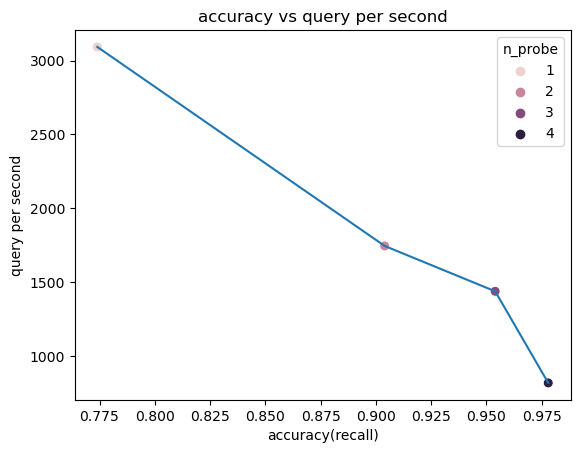

In [201]:
sns.lineplot(x = accuracies_ivf, y = qps_ivf)
sns.scatterplot(x = accuracies_ivf, y = qps_ivf, hue = n_probes, s = 50)
plt.xlabel("accuracy(recall)")
plt.ylabel("query per second")
plt.legend(title = "n_probe")
plt.title("accuracy vs query per second")
plt.show()

### HNSW

In [123]:
hnsw = HNSW("cosine", M = 8, efConstruction=50)

for i in range(len(train)):
    hnsw.insert(train[i])

In [124]:
## hnsw index 확인
hnsw._graphs

[{0: {25: 0.24912714958190918,
   127: 0.24590307474136353,
   149: 0.22567856311798096,
   198: 0.22396808862686157,
   232: 0.2216860055923462,
   319: 0.20759117603302002,
   459: 0.19374573230743408,
   482: 0.24327385425567627,
   514: 0.20589566230773926,
   517: 0.2177179455757141,
   662: 0.20647001266479492,
   695: 0.22274982929229736,
   744: 0.24603629112243652,
   761: 0.23570126295089722,
   769: 0.254859983921051,
   778: 0.22748512029647827},
  1: {15: 0.2294013500213623,
   17: 0.22895824909210205,
   19: 0.2234281301498413,
   26: 0.23150849342346191,
   125: 0.2124854326248169,
   152: 0.22678548097610474,
   169: 0.21531808376312256,
   252: 0.22512924671173096,
   263: 0.21463996171951294,
   346: 0.22523295879364014,
   511: 0.22512519359588623,
   522: 0.21962040662765503,
   618: 0.18741506338119507,
   624: 0.21302974224090576,
   804: 0.221482515335083,
   865: 0.20960944890975952},
  2: {43: 0.23295563459396362,
   48: 0.22755587100982666,
   76: 0.2281618118

In [125]:
## layer별 노드 수
for i in range(len(hnsw._graphs)):
    print(f"layer {i} : {len(hnsw._graphs[i])}")

layer 0 : 900
layer 1 : 125
layer 2 : 18
layer 3 : 3
layer 4 : 1


In [126]:
## search

hnsw.search(test[0], 5)

[(791, 0.18023627996444702),
 (199, 0.18199849128723145),
 (270, 0.19761407375335693),
 (498, 0.20239180326461792),
 (320, 0.20566928386688232)]

In [127]:
## true-NN 확인
[(n, d) for d, n in zip(distances[0][:5], neighbors[0][:5])]

[(791, 0.18023627996444702),
 (199, 0.18199849128723145),
 (270, 0.19761407375335693),
 (498, 0.20239192247390747),
 (320, 0.20566928386688232)]

In [193]:
## count of visited nodes
hnsw.search(test[0], 5)


[(791, 0.18023627996444702),
 (199, 0.18199849128723145),
 (270, 0.19761407375335693),
 (498, 0.20239180326461792),
 (320, 0.20566928386688232)]

### HNSW 성능평가

In [ ]:
build_time_df = pd.DataFrame(columns=["M", "efConstruction", "build time"])

# Parameters
M = [4, 8, 16]
efConstruction = [20, 30, 40]

for m in M:
    for ef in efConstruction:
        hnsw = HNSW("cosine", M=m, efConstruction=ef)
        start = time.time()
        for i in range(len(train)):
            hnsw.insert(train[i])
        build_time = time.time() - start
        
        # Use pd.concat to add a row
        build_time_df = pd.concat(
            [build_time_df, pd.DataFrame({"M": [m], "efConstruction": [ef], "build time": [build_time]})],
            ignore_index=True
        )

/var/folders/l9/cp7frsgj2kzcg8x8z5n6sv440000gn/T/ipykernel_93148/205019155.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  build_time_df = pd.concat(


In [176]:
build_time_df

M efConstruction  build time
0   4             20    1.730599
1   4             30    2.168374
2   4             40    2.424577
3   8             20    2.286838
4   8             30    3.212371
5   8             40    3.520917
6  16             20    2.910307
7  16             30    3.571751
8  16             40    4.176956

/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='M', ylabel='build time'>

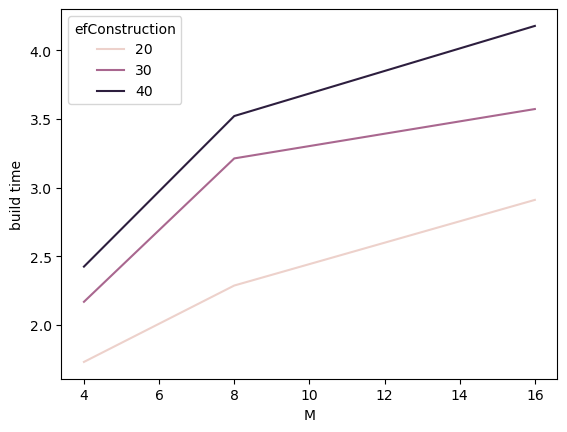

In [178]:
sns.lineplot(x = 'M', y = 'build time', data = build_time_df, hue = 'efConstruction')

In [179]:
## search speed and accuracy with different ef
hnsw = HNSW("cosine", M = 8, efConstruction=50)

for i in range(len(train)):
    hnsw.insert(train[i])

In [202]:
efs = [10, 20, 30, 40]
accuracies_hnsw = []
qps_hnsw = []

for ef in efs:

    query_acc = []
    query_per_second = []

    for i in range(len(test)):
        start = time.time()
        search_result = hnsw.search(test[i], 5, ef)
        query_per_second.append(1 / (time.time() - start))
        
        acc = len(set(neighbors[i][:5]) & set([idx for idx, _ in search_result])) / 5
        query_acc.append(acc)

    qps_hnsw.append(np.mean(query_per_second))
    accuracies_hnsw.append(np.mean(query_acc))


for ef, acc, qp in zip(efs, accuracies_hnsw, qps_hnsw):
    print(f"ef : {ef}, accuracy : {acc}, qps : {qp}")


ef : 10, accuracy : 0.94, qps : 631.4910680467581
ef : 20, accuracy : 0.9720000000000002, qps : 502.5338949576063
ef : 30, accuracy : 0.98, qps : 339.7387230101391
ef : 40, accuracy : 0.986, qps : 280.23286179668634


/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaewon/miniconda3/envs/hnsw/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


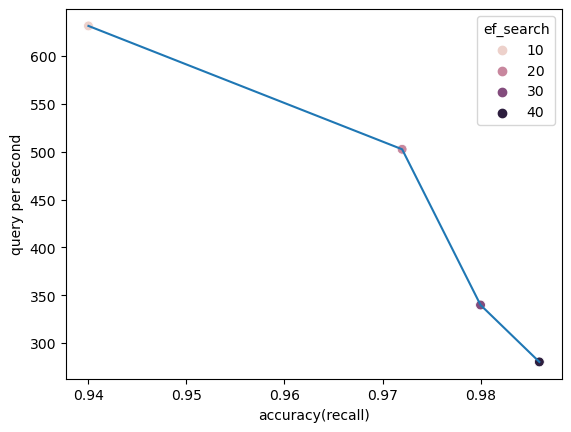

In [203]:
sns.lineplot(x = accuracies_hnsw, y = qps_hnsw)
sns.scatterplot(x = accuracies_hnsw, y = qps_hnsw, hue = efs, s = 50)
plt.xlabel("accuracy(recall)")
plt.ylabel("query per second")
plt.legend(title = "ef_search")

## Binary Quantization

In [297]:
import numpy as np
from scipy.spatial.distance import hamming, cosine

class BinaryQuantization:
    def __init__(self, vectors):
        self.full_vectors = vectors
        self.vectors = self.binary_quantization(vectors)

    def binary_quantization(self, vectors):
        return np.where(vectors >= 0, 1, 0)

    def search(self, query, k):
        query_bin = self.binary_quantization(query)
        distances = np.array([hamming(query_bin, vec_bin) for vec_bin in self.vectors])
        closest_index = np.argsort(distances)[:k]

        return [(idx, distances[idx]) for idx in closest_index]

    def full_search(self, query, filtered_idx, k):
        
        distances = np.array([cosine(query, vec) for vec in self.full_vectors[filtered_idx]])
        closest_index = np.argsort(distances)[:k]

        return [(filtered_idx[idx], distances[idx]) for idx in closest_index]
    

In [299]:
bq = BinaryQuantization(train[:])

In [300]:
bq.search(test[0], 5)


[(199, 0.263671875),
 (270, 0.2734375),
 (520, 0.2786458333333333),
 (791, 0.28125),
 (498, 0.2916666666666667)]

In [301]:
[(n, d) for d, n in zip(distances[0][:5], neighbors[0][:5])]

[(791, 0.18023627996444702),
 (199, 0.18199849128723145),
 (270, 0.19761407375335693),
 (498, 0.20239192247390747),
 (320, 0.20566928386688232)]

In [302]:
## search speed and accuracy

qps_bq = []
accuracies_bq = []

for i in range(len(test)):
    start = time.time()
    search_result = bq.search(test[i], 5)
    qps_bq.append(1 / (time.time() - start))

    acc = len(set(neighbors[i][:5]) & set([idx for idx, _ in search_result])) / 5
    accuracies_bq.append(acc)

print(f"accuracy : {np.mean(accuracies_bq)}, qps : {np.mean(qps_bq)}")


accuracy : 0.682, qps : 63.59612077669805


In [309]:
## BQ만으로는 성능 부족 -> over-filtering 후 re-ranking 필요
qps_bq = []

## over-filtering
k = 20

for i in range(len(test)):
    search_result = bq.search(test[i], k)
    filtered_idx = np.array([idx for idx, _ in search_result])
    search_result = bq.full_search(test[i], filtered_idx, 5)
    acc = len(set(neighbors[i][:5]) & set([idx for idx, _ in search_result])) / 5
    accuracies_bq.append(acc)

print(f"accuracy : {np.mean(accuracies_bq)}")

accuracy : 0.9384999999999999
